# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 7</center>

# <center>Machine Learning Workflow</center>

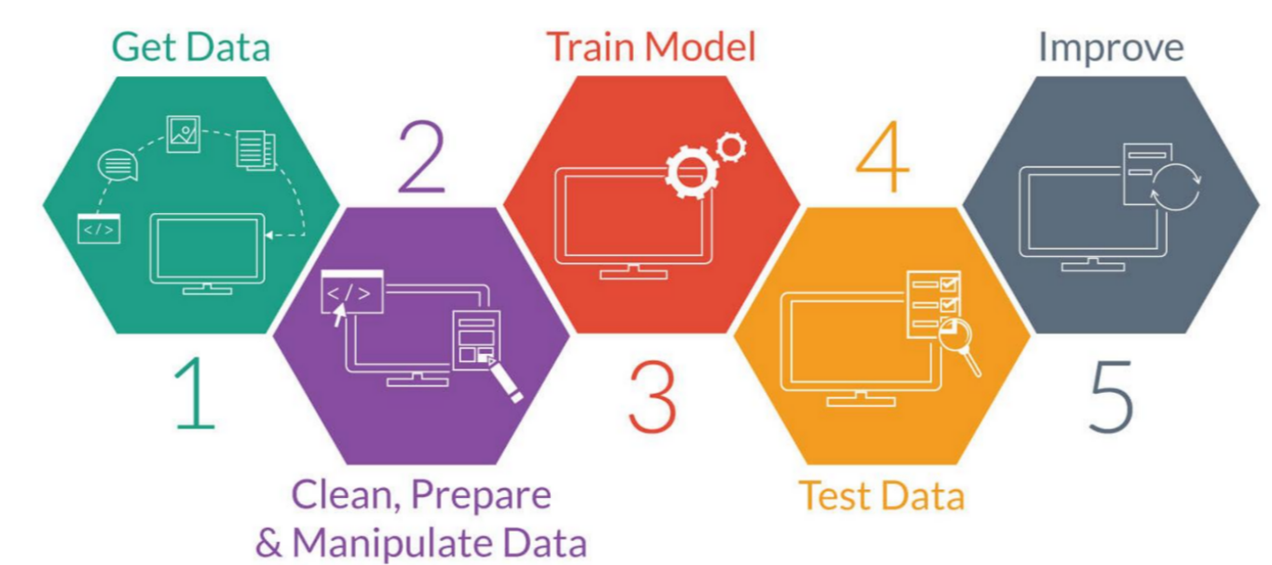

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Data Manipulation and Feature Engineering</li>
<li> Train Test Split</li>
<li> Train model </li>
<li> Test the Model</li>
<li> Make Predictions </li>
</ol>

## <font color = blue>0. Learning Objectives

Follow machine learning workflow to create machine learning model and evaluate the performance of the machine learning model.

By the end of the lab, you should be able to :
- Load dataset and perform necessary data engineering and feature engineering techniques on given dataset.


- Split given dataset into train and test set.


- Evaluate the model performance for both train and test dataset.




## <font color = blue>1. Loading Data

    - Load iris flower data from sklearn.datasets module. Create dataframe from the iris data.
    
    
### Different species of Iris Flower
!["Iris Species"](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Dataset and Iris Attributes

![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

In [1]:
#Load your data here
#Load the iris datasets using sklearn : Note you can also d/l from UCI and read using pd.read_csv
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
# Get the detail info on the dataset
# Such as: How are the data arranged, name of the column, units, missing values
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [3]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
#explore other keys in in the given data
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#Usually I keep all the data in a Pandas dataframe.
#So we need to combine the features and targets(labels) into a single dataframe

#Add the features
df['target'] = iris.target
df.head()
#Add the label (target)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#use pandas basic methods to get result
df.shape




(150, 5)

## <font color = blue>2. Data Manipulation and Feature Engineering


In [8]:
import matplotlib.pyplot as plt
#Let's do some visualisation
import seaborn as sns
#Plot the distribution of each fetures of each class

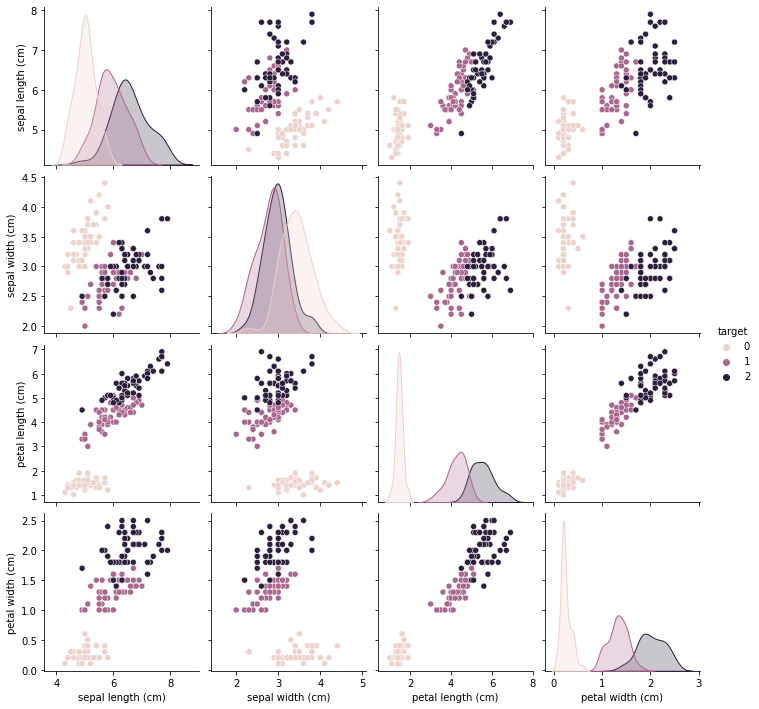

In [9]:
#use pair plot to check relation
sns.pairplot(df,hue='target')

<AxesSubplot:>

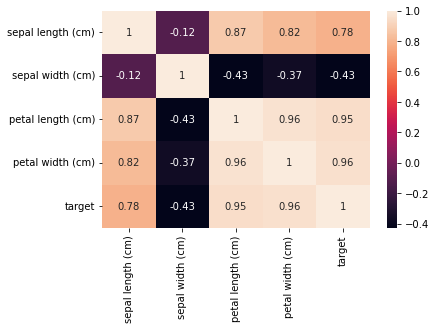

In [10]:
#Let's do correlation plot on the data to see how the each features are co-related
sns.heatmap(df.corr(),annot=True)

# A high correlation can help us use dimension reduction



## <font color = blue>3. Split data for train and test



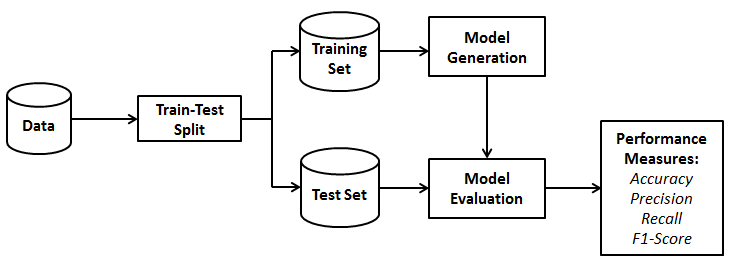

1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

In [11]:
from sklearn.model_selection import train_test_split
# X contains the features, y is the label
x = df[iris.feature_names]
y = df.target

#Split the data into training and testing sets
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=5,shuffle=True,stratify=y)
x_train




sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
48                 5.3               3.7                1.5               0.2
40                 5.0               3.5                1.3               0.3
45                 4.8               3.0                1.4               0.3
56                 6.3               3.3                4.7               1.6
128                6.4               2.8                5.6               2.1
..                 ...               ...                ...               ...
99                 5.7               2.8                4.1               1.3
97                 6.2               2.9                4.3               1.3
41                 4.5               2.3                1.3               0.3
32                 5.2               4.1                1.5               0.1
66                 5.6               3.0                4.5               1.5

[120 rows x 4 columns]

## <font color = blue>4. Training Model


In [12]:
#Import the estimators from the sklearn libraries
from sklearn.linear_model import LogisticRegression
irismodel = LogisticRegression()
#Train the model
irismodel.fit(x_train,y_train)
#Start the training 


C:\Users\Lab-2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## <font color = blue>5. Test Model


In [13]:
#Test out the model using some prediction
y_pred = irismodel.predict(x_test)
y_pred

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 1])

In [14]:
y_test

36     0
27     0
38     0
105    2
93     1
141    2
9      0
16     0
80     1
94     1
8      0
39     0
86     1
118    2
53     1
124    2
111    2
129    2
47     0
61     1
35     0
92     1
127    2
133    2
57     1
14     0
148    2
122    2
51     1
95     1
Name: target, dtype: int32

## <font color = blue>6. Model Evaluation
    
- Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses
    
    

### <font color = "blue">6.1 Accuracy Score

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
    
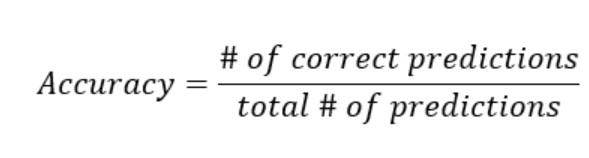

`sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`

In [15]:
# Find accuracy score for test data.
#matric is a unit measurement

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9666666666666667

## <font color = blue>5. Make Predictions


In [16]:
#Use predict method to make prediction to unseen data
y_pred_train = irismodel.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.9833333333333333

# TODO/ HOMEWORK


INSTRUCTIONS:

- Follow Machine learning Workflow and create model for boston housing dataset. 



- Compare train and test accuracy for the model.

In [17]:
#Solution
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\Lab-2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [18]:
bdf = pd.DataFrame(data=boston.data,columns = boston.feature_names)
bdf

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [19]:
 bdf['target'] = boston.target
bdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

<AxesSubplot:>

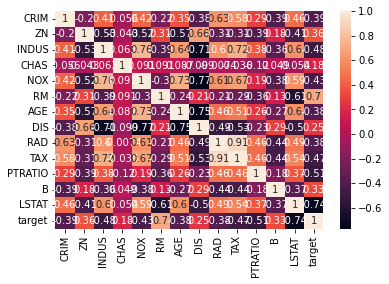

In [20]:
bdf.corr()
import seaborn as sns
sns.heatmap(bdf.corr(),annot=True)

In [21]:
bx = bdf[boston.feature_names]
by = bdf.target

bx_train,bx_test,by_train,by_test =  train_test_split(bx,by,test_size=0.2,random_state=5,shuffle=True)
bx_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE      DIS   RAD    TAX  \
33    1.15172   0.0   8.14   0.0  0.538  5.701   95.0   3.7872   4.0  307.0   
283   0.01501  90.0   1.21   1.0  0.401  7.923   24.8   5.8850   1.0  198.0   
418  73.53410   0.0  18.10   0.0  0.679  5.957  100.0   1.8026  24.0  666.0   
502   0.04527   0.0  11.93   0.0  0.573  6.120   76.7   2.2875   1.0  273.0   
402   9.59571   0.0  18.10   0.0  0.693  6.404  100.0   1.6390  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...      ...   ...    ...   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8   3.5459  24.0  666.0   
189   0.08370  45.0   3.44   0.0  0.437  7.185   38.9   4.5667   5.0  398.0   
495   0.17899   0.0   9.69   0.0  0.585  5.670   28.8   2.7986   6.0  391.0   
206   0.22969   0.0  10.59   0.0  0.489  6.326   52.5   4.3549   4.0  277.0   
355   0.10659  80.0   1.91   0.0  0.413  5.936   19.5  10.5857   4.0  334.0   

     PTRATIO       B  LSTAT  
33      21.0  358.77  18.35  
283     13.6  395.52   3.16  
418     20.2   16.45  20.62  
502     21.0  396.90   9.08  
402     20.2  376.11  20.31  
..       ...     ...    ...  
486     20.2  392.68  14.98  
189     15.2  396.90   5.39  
495     19.2  393.29  17.60  
206     18.6  394.87  10.97  
355     22.0  376.04   5.57  

[404 rows x 13 columns]

In [22]:
from sklearn.linear_model import LinearRegression
lmodel= LinearRegression()

In [23]:
lmodel.fit(bx_train,by_train)

LinearRegression()

In [24]:
lmodel.coef_

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

In [25]:
by_pred = lmodel.predict(bx_test)
bx_pred = lmodel.predict(bx_train)

In [26]:
from sklearn.metrics import r2_score
r2_score(by_test,by_pred)


0.7334492147453113

In [27]:
r2_score(by_train,bx_pred)

0.7383393920590519

In [28]:
X_sample = [[0.02,0,7.07,0,0.469,6.4,78.9,4.96,2,242,17.8,396.9,9.14]]
lmodel.predict(X_sample)

C:\Users\Lab-2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.78827519])